# PROJECT 2: DECISION TREE
Môn học: Artificial Intelligence

## Khai báo thư viện

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer 

## Chuẩn bị tập dữ liệu

### Tải tập dữ liệu

In [22]:
# Breast Cancer Dataset
breast_cancer_wisconsin_diagnostic = load_breast_cancer()
bc_features = pd.DataFrame(breast_cancer_wisconsin_diagnostic.data, columns=breast_cancer_wisconsin_diagnostic.feature_names)  # Các đặc trưng
bc_labels = pd.Series(breast_cancer_wisconsin_diagnostic.target, name="label")  # Nhãn: 0 = Malignant, 1 = Benign

# White Wine Quality Dataset
file_path = './data/wine+quality/winequality-white.csv'
w_wine_data = pd.read_csv(file_path, sep=';')
w_wine_features = w_wine_data.iloc[:, :-1]
w_wine_labels = w_wine_data['quality']

# Red Wine Quality Dataset
file_path = './data/wine+quality/winequality-red.csv'
r_wine_data = pd.read_csv(file_path, sep=';')
r_wine_features = r_wine_data.iloc[:, :-1]
r_wine_labels = r_wine_data['quality']

# Titanic Dataset
file_path = './data/Titanic/Titanic-Dataset.csv'
titanic_data = pd.read_csv(file_path)
titanic_features = titanic_data.iloc[:, :-1]
titanic_labels = titanic_data['Survived']

### Chuẩn bị các tập dữ liệu

In [23]:
def prepare_datasets(features, labels):
    subsets = {}  # Sử dụng dictionary thay vì danh sách để dễ dàng lưu trữ các tập
    # Chia dữ liệu với các tỷ lệ khác nhau và lưu vào dictionary
    feature_train_40, feature_test_60, label_train_40, label_test_60 = train_test_split(features, labels, train_size=0.4, stratify=labels, shuffle=True, random_state=0)
    subsets['train_40'] = (feature_train_40, label_train_40)
    subsets['test_60'] = (feature_test_60, label_test_60)

    feature_train_60, feature_test_40, label_train_60, label_test_40 = train_test_split(features, labels, train_size=0.6, stratify=labels, shuffle=True, random_state=0)
    subsets['train_60'] = (feature_train_60, label_train_60)
    subsets['test_40'] = (feature_test_40, label_test_40)

    feature_train_80, feature_test_20, label_train_80, label_test_20 = train_test_split(features, labels, train_size=0.8, stratify=labels, shuffle=True, random_state=0)
    subsets['train_80'] = (feature_train_80, label_train_80)
    subsets['test_20'] = (feature_test_20, label_test_20)

    feature_train_90, feature_test_10, label_train_90, label_test_10 = train_test_split(features, labels, train_size=0.9, stratify=labels, shuffle=True, random_state=0)
    subsets['train_90'] = (feature_train_90, label_train_90)
    subsets['test_10'] = (feature_test_10, label_test_10)

    return subsets

# Tạo các tập huấn luyện và kiểm tra cho Breast Cancer Dataset
bc_datasets = prepare_datasets(bc_features, bc_labels)

# Tạo các tập huấn luyện và kiểm tra cho White Wine Quality Dataset
w_wine_datasets = prepare_datasets(w_wine_features, w_wine_labels)

# Tạo các tập huấn luyện và kiểm tra cho Red Wine Quality Dataset
r_wine_datasets = prepare_datasets(r_wine_features, r_wine_labels)

# Tạo các tập huấn luyện và kiểm tra cho Titanic Dataset
titanic_datasets = prepare_datasets(titanic_features,titanic_labels)

In [24]:
# Danh sách tên các lớp
class_names_bc = ["Malignant", "Benign"]  # Breast Cancer: 0 = Malignant, 1 = Benign
class_names_wine = [str(i) for i in range(11)]  # Wine Quality: chất lượng từ 0 đến 10
class_names_titanic = ["Survived", "Unsurvived"]

def draw_plot(original, train, test, title, class_names, ax):
    # Tính tần suất các lớp, đảm bảo rằng tất cả các lớp đều được hiển thị
    count_org = pd.Series(original).value_counts().reindex(range(len(class_names)), fill_value=0)
    count_train = pd.Series(train).value_counts().reindex(range(len(class_names)), fill_value=0)
    count_test = pd.Series(test).value_counts().reindex(range(len(class_names)), fill_value=0)

    # Tạo DataFrame để lưu phân phối lớp
    frame = pd.DataFrame({'original': count_org, 'train': count_train, 'test': count_test})

    # Vẽ biểu đồ cột
    frame.plot(kind='bar', ax=ax, xlabel="Classes", ylabel="Count", title=title, color=['#f45d01', '#eeb902', '#97cc04'])
    ax.bar_label(ax.containers[0])  # Thêm nhãn cho cột
    ax.set_xticklabels(class_names, rotation=0)  # Đặt nhãn cho trục x


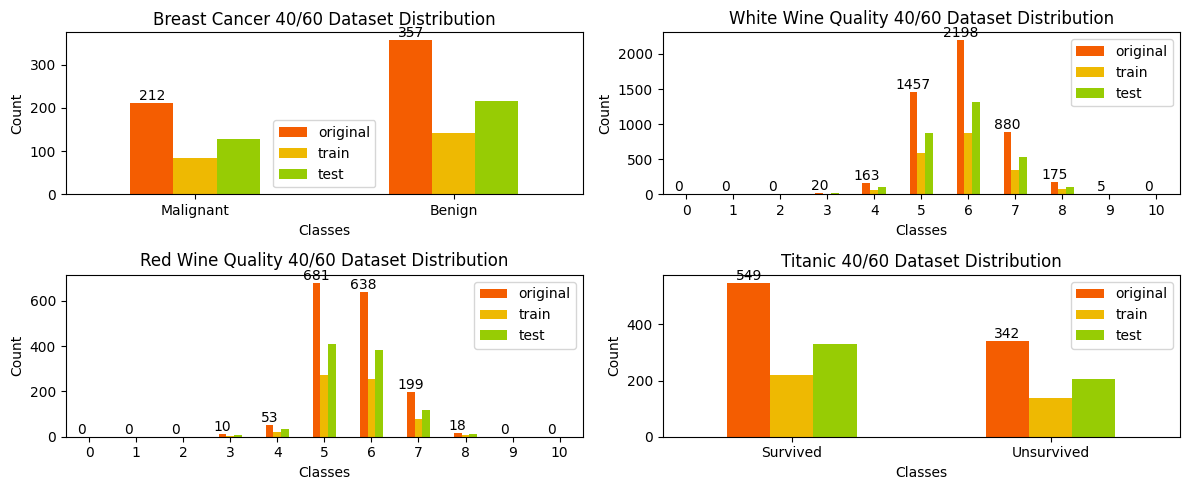

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(12, 5))  # 1 hàng, 2 cột

draw_plot(bc_labels, bc_datasets['train_40'][1], bc_datasets['test_60'][1], "Breast Cancer 40/60 Dataset Distribution", class_names_bc, axs[0,0])
draw_plot(w_wine_labels, w_wine_datasets['train_40'][1], w_wine_datasets['test_60'][1], "White Wine Quality 40/60 Dataset Distribution", class_names_wine, axs[0,1])
draw_plot(r_wine_labels, r_wine_datasets['train_40'][1], r_wine_datasets['test_60'][1], "Red Wine Quality 40/60 Dataset Distribution", class_names_wine, axs[1,0])
draw_plot(titanic_labels, titanic_datasets['train_40'][1], titanic_datasets['test_60'][1], "Titanic 40/60 Dataset Distribution", class_names_titanic, axs[1,1])

plt.tight_layout()
plt.show()

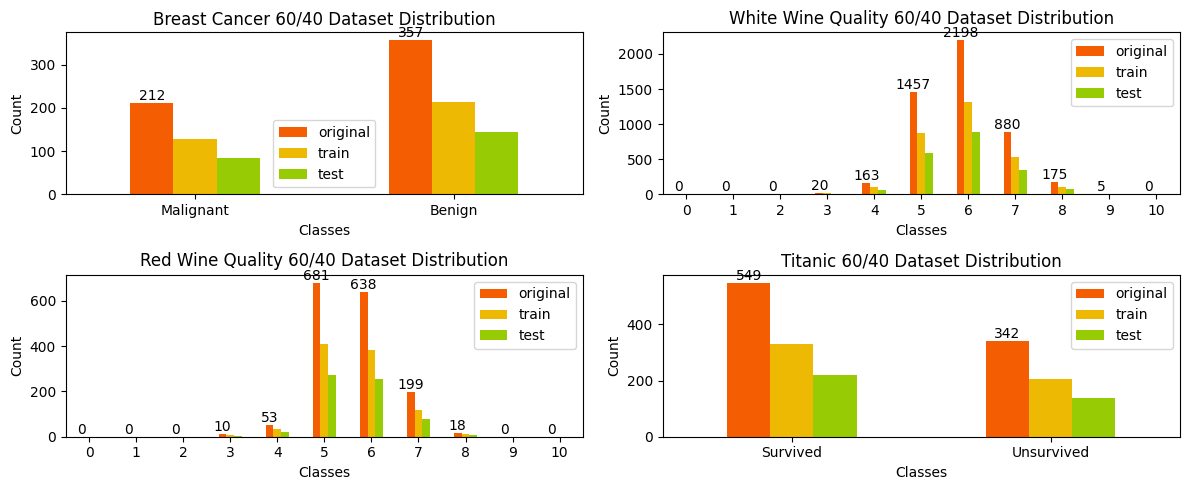

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(12, 5))

draw_plot(bc_labels, bc_datasets['train_60'][1], bc_datasets['test_40'][1], "Breast Cancer 60/40 Dataset Distribution", class_names_bc, axs[0,0])
draw_plot(w_wine_labels, w_wine_datasets['train_60'][1], w_wine_datasets['test_40'][1], "White Wine Quality 60/40 Dataset Distribution", class_names_wine, axs[0,1])
draw_plot(r_wine_labels, r_wine_datasets['train_60'][1], r_wine_datasets['test_40'][1], "Red Wine Quality 60/40 Dataset Distribution", class_names_wine, axs[1,0])
draw_plot(titanic_labels, titanic_datasets['train_60'][1], titanic_datasets['test_40'][1], "Titanic 60/40 Dataset Distribution", class_names_titanic, axs[1,1])

plt.tight_layout()
plt.show()

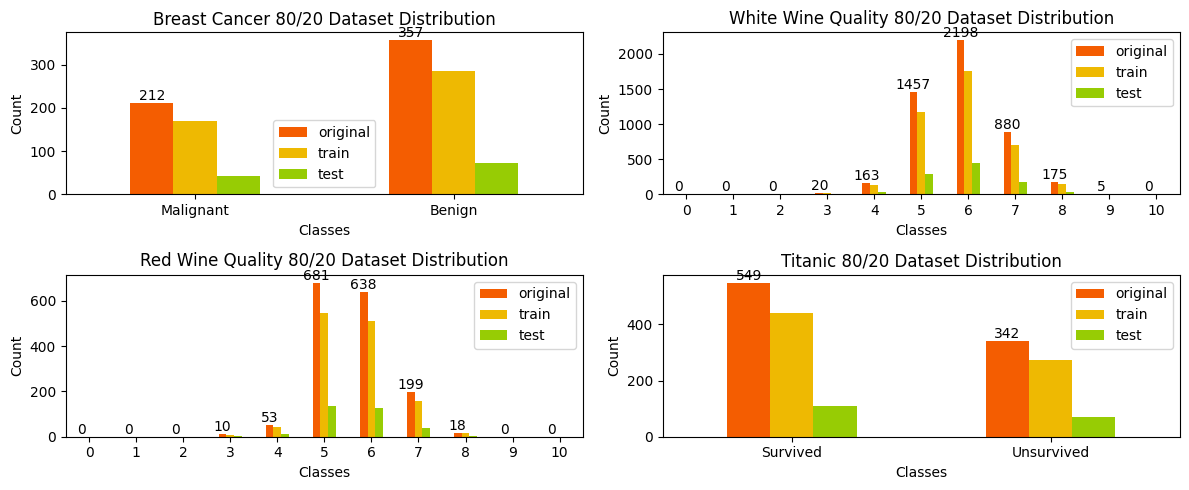

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(12, 5))

draw_plot(bc_labels, bc_datasets['train_80'][1], bc_datasets['test_20'][1], "Breast Cancer 80/20 Dataset Distribution", class_names_bc, axs[0,0])
draw_plot(w_wine_labels, w_wine_datasets['train_80'][1], w_wine_datasets['test_20'][1], "White Wine Quality 80/20 Dataset Distribution", class_names_wine, axs[0,1])
draw_plot(r_wine_labels, r_wine_datasets['train_80'][1], r_wine_datasets['test_20'][1], "Red Wine Quality 80/20 Dataset Distribution", class_names_wine, axs[1,0])
draw_plot(titanic_labels, titanic_datasets['train_80'][1], titanic_datasets['test_20'][1], "Titanic 80/20 Dataset Distribution", class_names_titanic, axs[1,1])

plt.tight_layout()
plt.show()

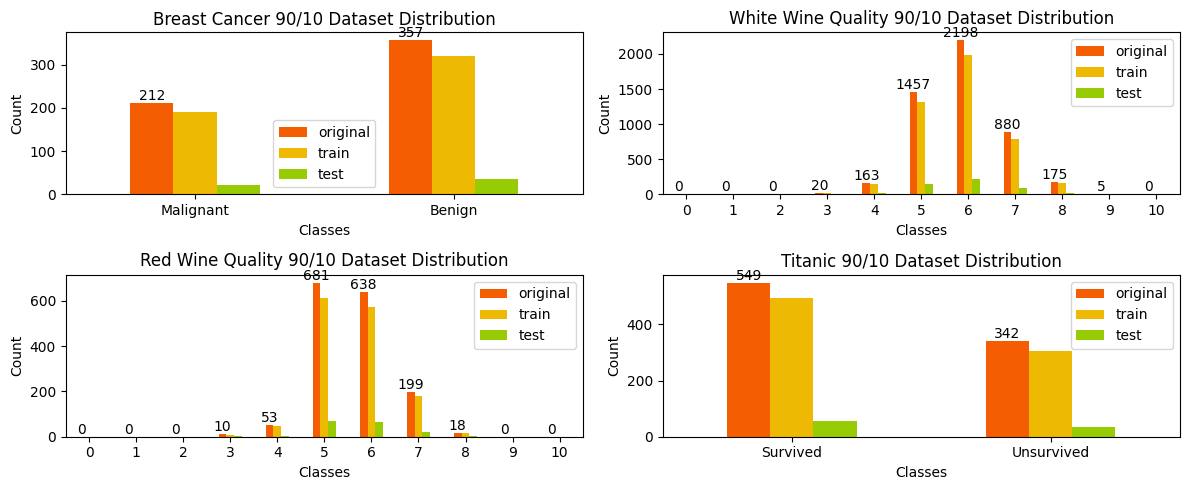

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(12, 5))

draw_plot(bc_labels, bc_datasets['train_90'][1], bc_datasets['test_10'][1], "Breast Cancer 90/10 Dataset Distribution", class_names_bc, axs[0,0])
draw_plot(w_wine_labels, w_wine_datasets['train_90'][1], w_wine_datasets['test_10'][1], "White Wine Quality 90/10 Dataset Distribution", class_names_wine, axs[0,1])
draw_plot(r_wine_labels, r_wine_datasets['train_90'][1], r_wine_datasets['test_10'][1], "Red Wine Quality 90/10 Dataset Distribution", class_names_wine, axs[1,0])
draw_plot(titanic_labels, titanic_datasets['train_90'][1], titanic_datasets['test_10'][1], "Titanic 90/10 Dataset Distribution", class_names_titanic, axs[1,1])

plt.tight_layout()
plt.show()